In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/UC Berkeley ML and AI Program/data analysis/Zomato Dataset.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [6]:
# Dataset shape and memory usage
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

# Column information and data types
print("Column Information:")
df.info()

# Missing values summary
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing_data,
    'Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Percent', ascending=False)
print("\nMissing Values Summary:")
print(missing_df if not missing_df.empty else "No missing values found")

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Statistical summary for numerical columns
print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (45584, 20)
Memory Usage: 33.64 MB

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Roa

In [7]:
# Data Cleaning
df_clean = df.copy()

# Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Removed {initial_rows - len(df_clean)} duplicate rows")

# Handle missing values
for column in df_clean.columns:
    missing_count = df_clean[column].isnull().sum()
    if missing_count > 0:
        if df_clean[column].dtype in ['int64', 'float64']:
            df_clean[column].fillna(df_clean[column].median(), inplace=True)
            print(f"Filled {missing_count} missing values in {column} with median")
        elif df_clean[column].dtype == 'object':
             # For object type columns, fill with mode.
             # Check if mode() is empty (can happen with all NaN values)
             if not df_clean[column].mode().empty:
                 df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)
                 print(f"Filled {missing_count} missing values in {column} with mode")
             else:
                 # If mode is empty, fill with a placeholder or drop, depending on context.
                 # For now, let's fill with a placeholder string for object types.
                 df_clean[column].fillna('Unknown', inplace=True)
                 print(f"Filled {missing_count} missing values in {column} with 'Unknown' as mode was empty")


# Convert date and time columns
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'], format='%d-%m-%Y', errors='coerce')
df_clean['Time_Orderd'] = pd.to_datetime(df_clean['Time_Orderd'], format='%H:%M', errors='coerce').dt.time
df_clean['Time_Order_picked'] = pd.to_datetime(df_clean['Time_Order_picked'], format='%H:%M', errors='coerce').dt.time


# Convert Time_Orderd and Time_Order_picked to datetime objects for calculations
# Combine Order_Date with Time_Orderd and Time_Order_picked
df_clean['order_datetime'] = pd.to_datetime(df_clean['Order_Date'].astype(str) + ' ' + df_clean['Time_Orderd'].astype(str), errors='coerce')
df_clean['picked_datetime'] = pd.to_datetime(df_clean['Order_Date'].astype(str) + ' ' + df_clean['Time_Order_picked'].astype(str), errors='coerce')

df_clean.head()
df_clean.info()
print(f"Cleaning completed. Final shape: {df_clean.shape}")



Removed 0 duplicate rows
Filled 1854 missing values in Delivery_person_Age with median
Filled 1908 missing values in Delivery_person_Ratings with median
Filled 1731 missing values in Time_Orderd with mode
Filled 616 missing values in Weather_conditions with mode
Filled 601 missing values in Road_traffic_density with mode
Filled 993 missing values in multiple_deliveries with median
Filled 228 missing values in Festival with mode
Filled 1200 missing values in City with mode
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude

In [8]:
# Make a copy to preserve the original DataFrame
df_features = df_clean.copy()

# --- Time-based features ---

# Extract hour from the combined datetime
df_features['hour'] = df_features['order_datetime'].dt.hour
df_features['day_of_week'] = df_features['Order_Date'].dt.dayofweek
df_features['weekday_name'] = df_features['Order_Date'].dt.day_name()
df_features['month'] = df_features['Order_Date'].dt.month
df_features['is_weekend'] = df_features['day_of_week'].isin([5, 6]).astype(int)

# Calculate order to picked time difference
df_features['order_picked_diff'] = (df_features['picked_datetime'] - df_features['order_datetime']).dt.total_seconds() / 60  # in minutes

# --- Geospatial features (Distance) ---

# Earth radius in kilometers
R = 6371

# Convert degrees to radians
lat1 = np.radians(df_features['Restaurant_latitude'])
lon1 = np.radians(df_features['Restaurant_longitude'])
lat2 = np.radians(df_features['Delivery_location_latitude'])
lon2 = np.radians(df_features['Delivery_location_longitude'])

# Compute differences
dlat = lat2 - lat1
dlon = lon2 - lon1

# Haversine formula
a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Distance in kilometers
df_features['distance_km'] = R * c

print("Distance column added.")

# --- Delivery speed ---
df_features['delivery_speed'] = df_features['distance_km'] / df_features['Time_taken (min)']



# --- Rating categories ---

df_features['rating_category'] = pd.cut(
        df_features['Delivery_person_Ratings'],
        bins=[4, 4.3, 4.5, 4.6, 4.7],
        labels=['Poor', 'Average', 'Good', 'Excellent']
    )

print("Basic feature engineering completed.")

display(df_features.head())

Distance column added.
Basic feature engineering completed.


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,picked_datetime,hour,day_of_week,weekday_name,month,is_weekend,order_picked_diff,distance_km,delivery_speed,rating_category
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,...,2022-02-12 22:10:00,21.0,5,Saturday,2,1,15.0,10.280582,0.223491,Poor
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,...,2022-02-13 15:05:00,14.0,6,Sunday,2,1,10.0,6.242319,0.271405,Excellent
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,...,2022-03-04 17:40:00,17.0,4,Friday,3,0,10.0,13.787860,0.656565,Excellent
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,...,2022-02-13 09:30:00,9.0,6,Sunday,2,1,10.0,2.930258,0.146513,Poor
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,...,2022-02-14 20:05:00,19.0,0,Monday,2,0,15.0,19.396618,0.473088,Excellent


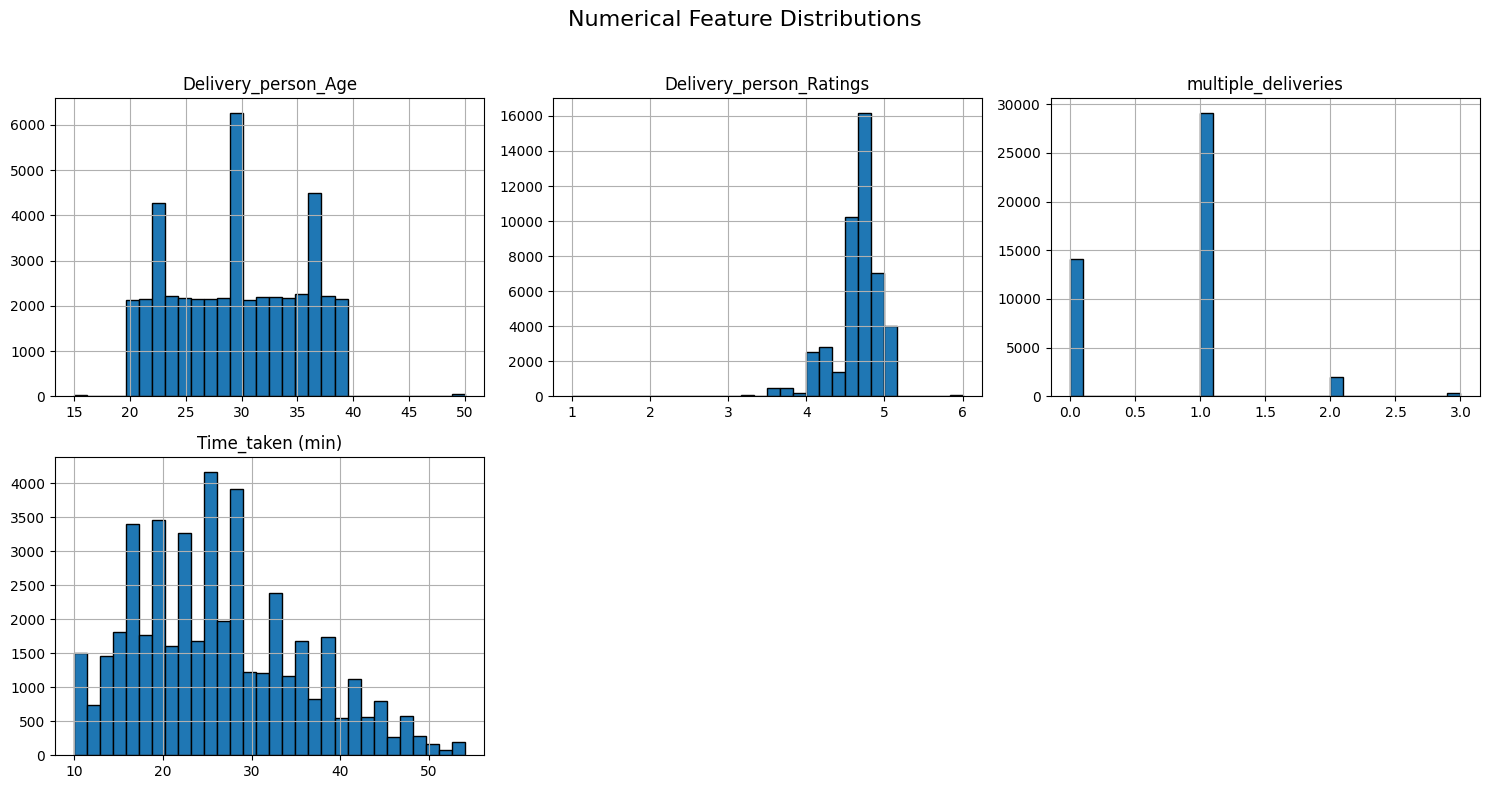

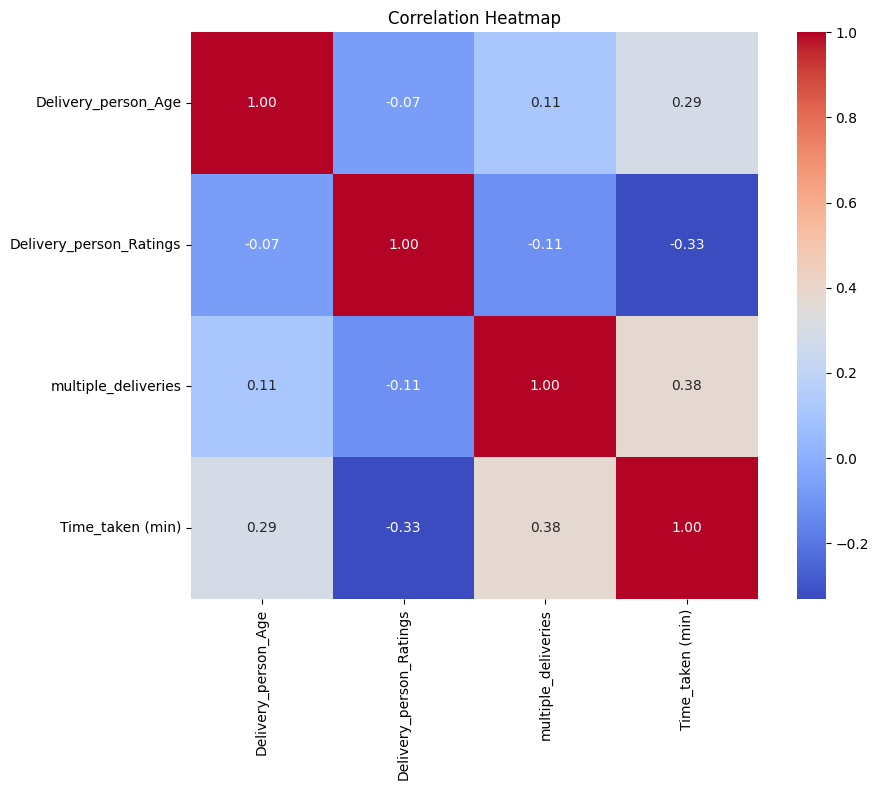

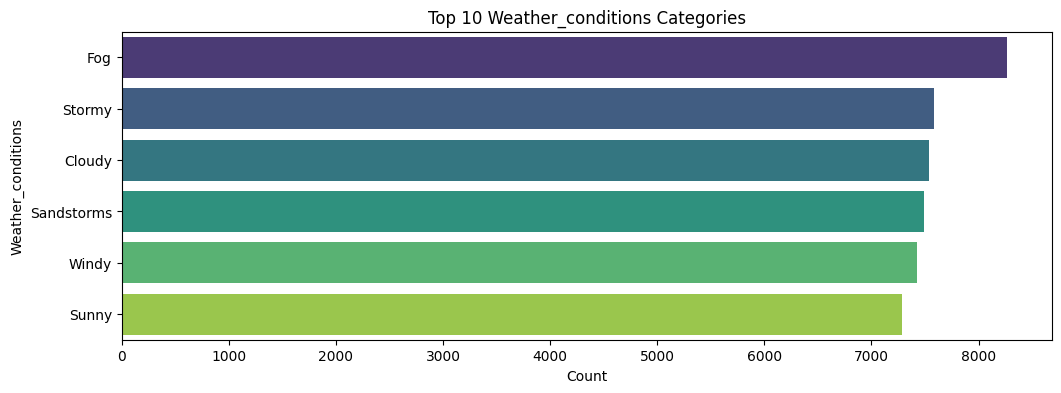

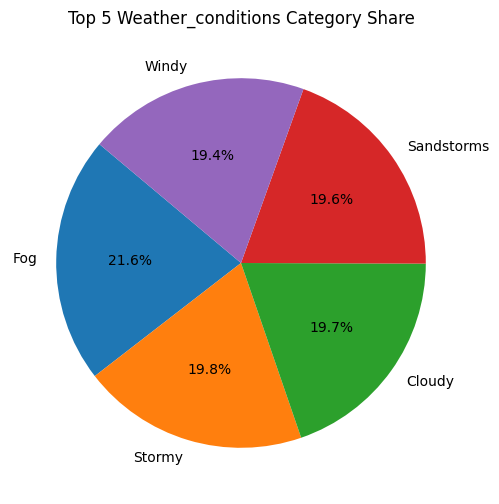

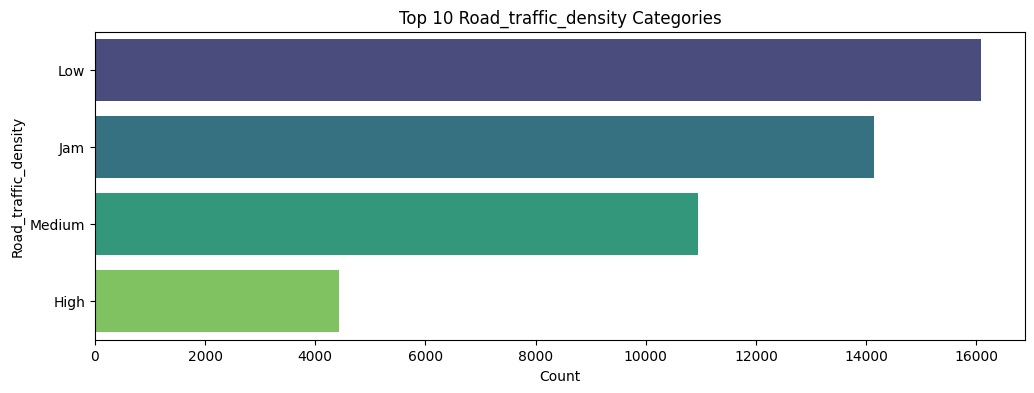

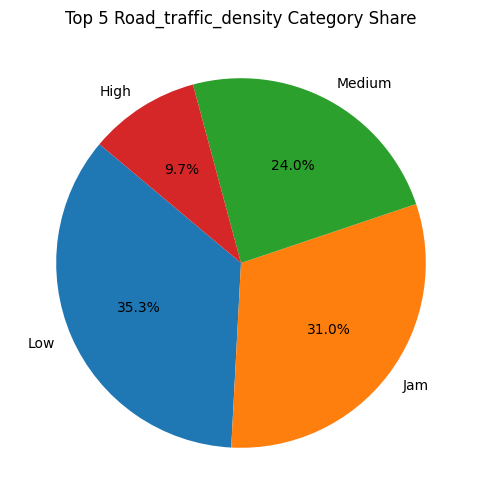

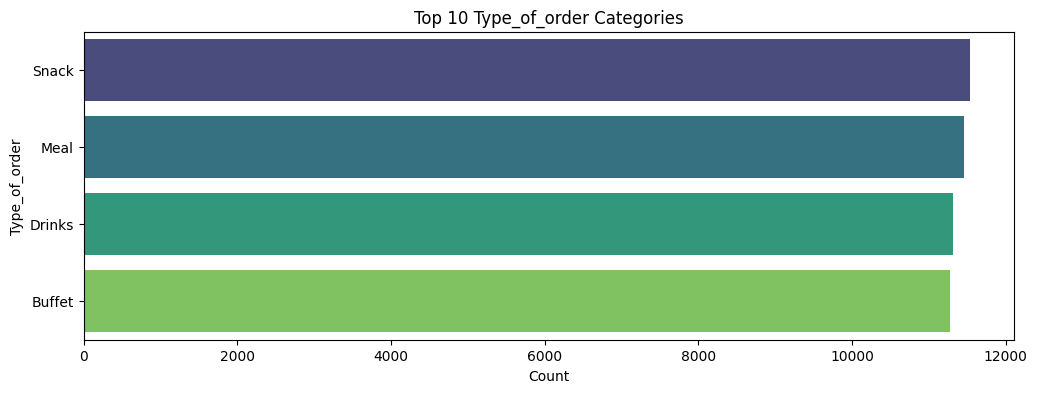

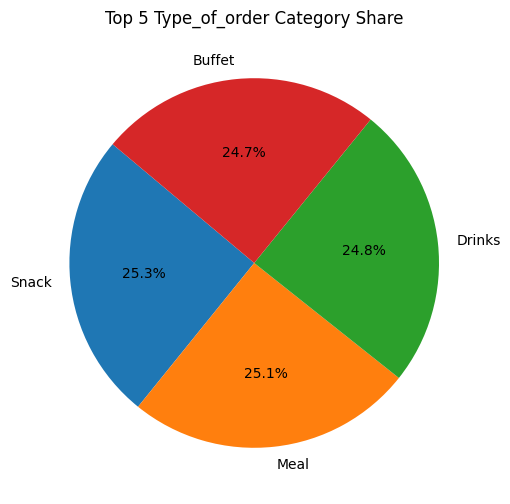

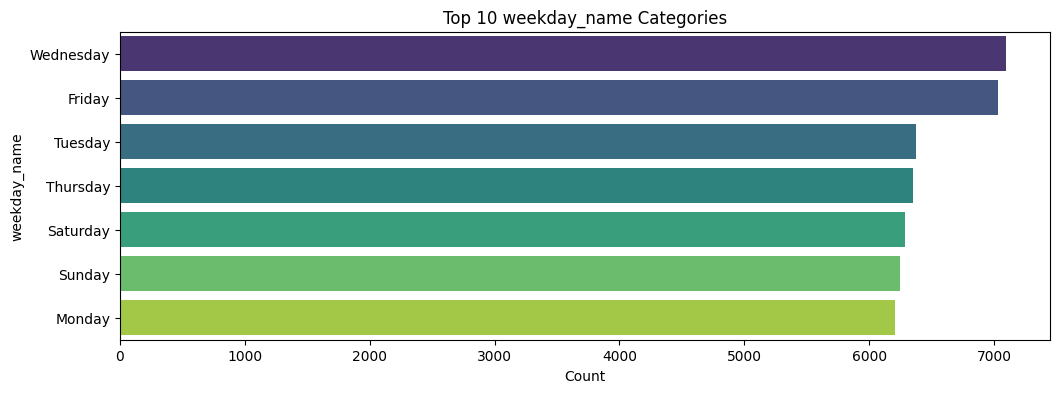

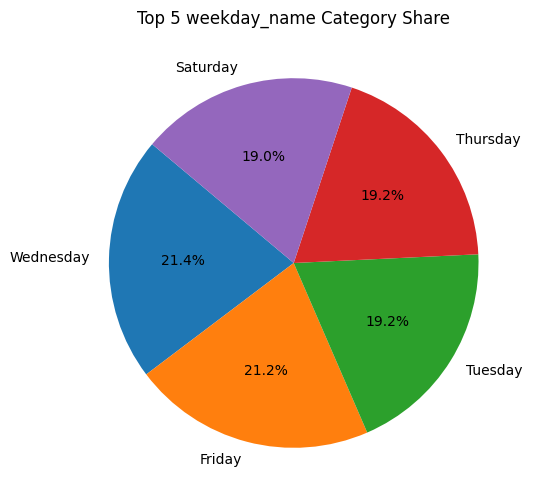

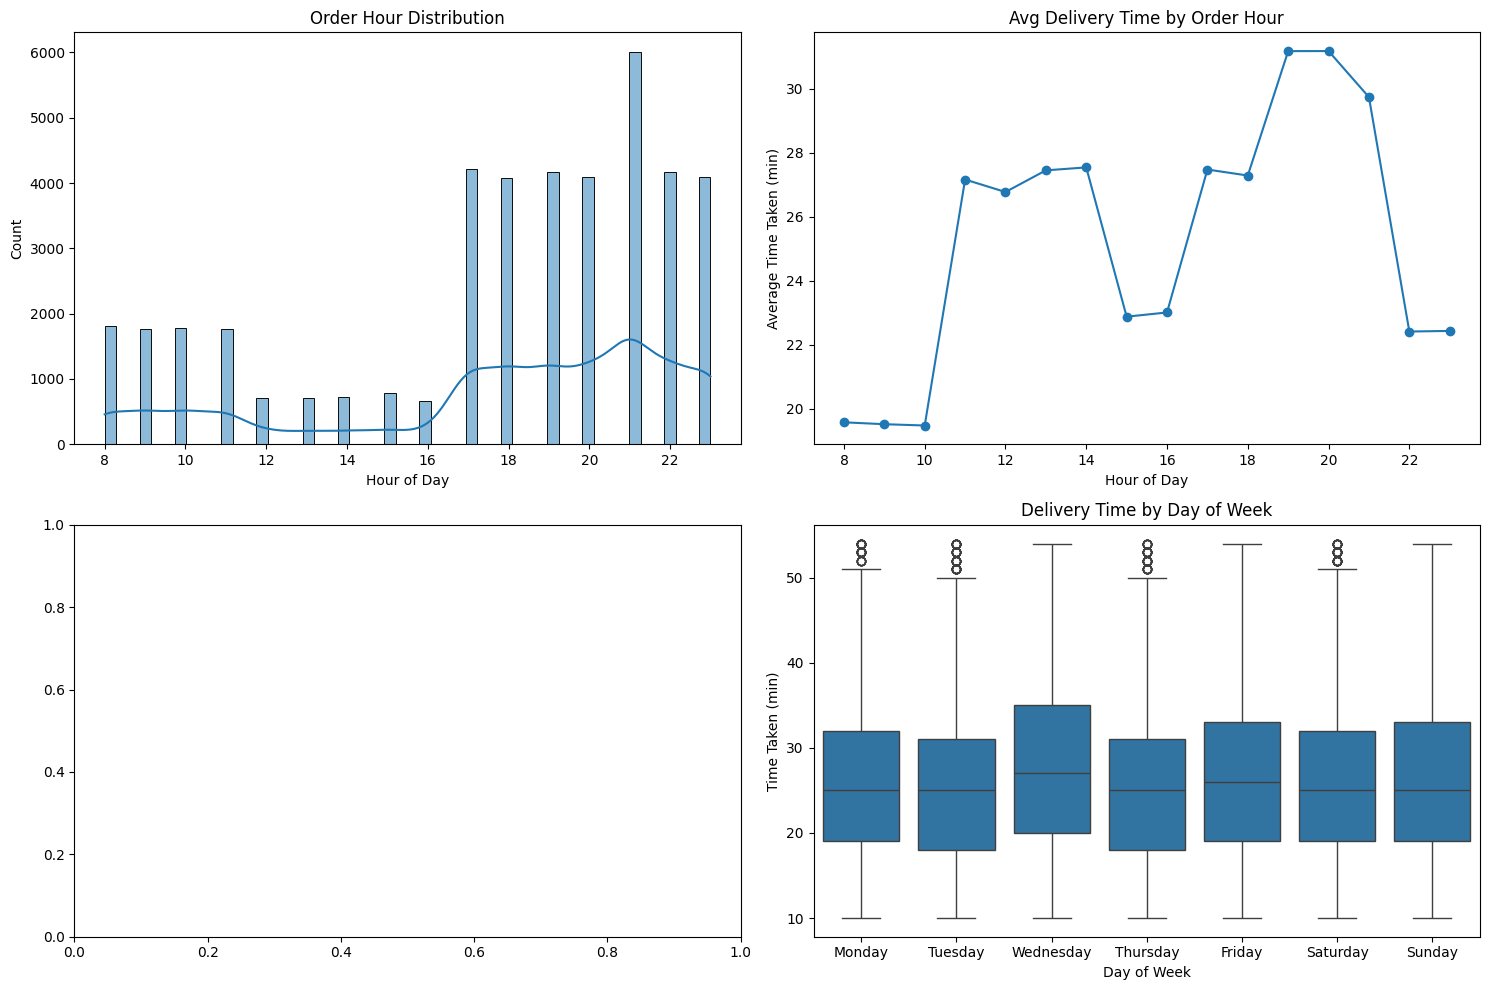

In [15]:
import os

# Create the 'Data' directory if it doesn't exist
if not os.path.exists('Data'):
    os.makedirs('Data')

# 1. Numerical Distributions
num_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken (min)']
if len(num_cols) > 0:
    df_features[num_cols].hist(bins=30, figsize=(15, 8), layout=(-1, 3), edgecolor='black')
    plt.suptitle('Numerical Feature Distributions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('Data/numerical_feature_distributions.png')
    plt.show()


# 2. Correlation Heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_features[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('Data/correlation_heatmap.png')
    plt.show()

# 3. Categorical Feature Counts (up to 4 columns)
cat_cols = ['Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'weekday_name']
for col in cat_cols:
    plt.figure(figsize=(12, 4))
    vc = df_features[col].value_counts().head(10)
    sns.barplot(x=vc.values, y=vc.index, palette='viridis')
    plt.title(f'Top 10 {col} Categories')
    plt.xlabel('Count')
    plt.savefig(f'Data/barplot_{col}.png')
    plt.show()

    # Pie chart for top 5 categories
    plt.figure(figsize=(6, 6))
    top5 = vc.head(5)
    plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 {col} Category Share')
    plt.savefig(f'Data/piechart_{col}.png')
    plt.show()


# 5. Delivery Performance (if delivery_time exists)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of Order Hour
sns.histplot(df_features['hour'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Order Hour Distribution')
axes[0,0].set_xlabel('Hour of Day')

# Avg Delivery Time by Order Hour
df_features.groupby('hour')['Time_taken (min)'].mean().plot(ax=axes[0,1], marker='o')
axes[0,1].set_title('Avg Delivery Time by Order Hour')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Average Time Taken (min)')


# Delivery Time by Day of Week
sns.boxplot(x='weekday_name', y='Time_taken (min)', data=df_features, ax=axes[1,1], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1,1].set_title('Delivery Time by Day of Week')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Time Taken (min)')


plt.tight_layout()
plt.savefig('Data/delivery_performance_plots.png')
plt.show()

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Regression for Time_taken (min)
if 'Time_taken (min)' in df_features.columns:
    print("="*50)
    print("DELIVERY TIME PREDICTION MODEL")
    print("="*50)

    # Prepare data
    df_ml = df_features.copy()
    feature_columns = df_ml.select_dtypes(include=[np.number]).columns.tolist()
    if 'Time_taken (min)' in feature_columns:
        feature_columns.remove('Time_taken (min)')

    categorical_columns = df_ml[feature_columns].select_dtypes(include=['object', 'category']).columns
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df_ml[col] = le.fit_transform(df_ml[col].astype(str))
        label_encoders[col] = le

    X = df_ml[feature_columns]
    y = df_ml['Time_taken (min)']
    X = X.fillna(X.median())
    y = y.fillna(y.median())

    # Train models
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    print("\nTraining Linear Regression...")
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print("Linear Regression Results:")
    print(f"RMSE: {rmse_lr:.4f}")
    print(f"R² Score: {r2_lr:.4f}")

    # Random Forest Regression
    print("\nTraining Random Forest...")
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)
    y_pred_rf = rf_reg.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print("Random Forest Results:")
    print(f"RMSE: {rmse_rf:.4f}")
    print(f"R² Score: {r2_rf:.4f}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_reg.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 10 Important Features for Delivery Time:")
    print(feature_importance.head(10))

# Classification for rating_category
if 'rating_category' in df_features.columns:
    print("\n" + "="*50)
    print("RATING CATEGORY PREDICTION MODEL")
    print("="*50)

    # Prepare data
    df_ml = df_features.copy()
    feature_columns = df_ml.select_dtypes(include=[np.number]).columns.tolist()
    if 'rating_category' in feature_columns:
        feature_columns.remove('rating_category')

    categorical_columns = df_ml[feature_columns].select_dtypes(include=['object', 'category']).columns
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df_ml[col] = le.fit_transform(df_ml[col].astype(str))
        label_encoders[col] = le

    X = df_ml[feature_columns]
    y = df_ml['rating_category']
    X = X.fillna(X.median())
    y = y.fillna(y.mode()[0])

    # Train models
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression
    print("\nTraining Logistic Regression...")
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log = log_reg.predict(X_test_scaled)
    accuracy_log = accuracy_score(y_test, y_pred_log)
    print("Logistic Regression Results:")
    print(f"Accuracy: {accuracy_log:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_log))

    # Random Forest Classification
    print("\nTraining Random Forest...")
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print("Random Forest Results:")
    print(f"Accuracy: {accuracy_rf:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))


DELIVERY TIME PREDICTION MODEL

Training Linear Regression...
Linear Regression Results:
RMSE: 7.5530
R² Score: 0.3533

Training Random Forest...
Random Forest Results:
RMSE: 0.7281
R² Score: 0.9940

Top 10 Important Features for Delivery Time:
                    feature  importance
14           delivery_speed    0.305762
13              distance_km    0.210291
1   Delivery_person_Ratings    0.187508
7       multiple_deliveries    0.110080
6         Vehicle_condition    0.063845
8                      hour    0.059722
0       Delivery_person_Age    0.054643
12        order_picked_diff    0.002493
2       Restaurant_latitude    0.001858
3      Restaurant_longitude    0.001292

RATING CATEGORY PREDICTION MODEL

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.6459

Classification Report:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00       916
   Excellent       0.67      0.92      0.78      5977
        Good   